In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
df = pd.read_csv('https://gist.githubusercontent.com/villrv/e41f634963f86d617c25cea3a8f32776/raw/9e6f23b626fe9653e61a5239dbd4f6cf6ce494ea/SchaeferSDSSLineData.txt',sep=' ')



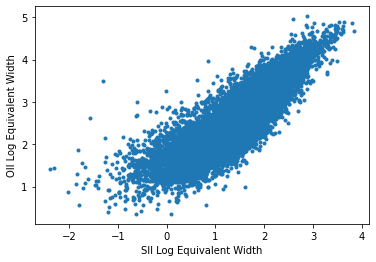

In [2]:
plt.plot(df['SII'],df['OII'],'.')
plt.xlabel('SII Log Equivalent Width')
plt.ylabel('OII Log Equivalent Width')

plt.show()

Coefficient of Determination:  0.7166922366460435


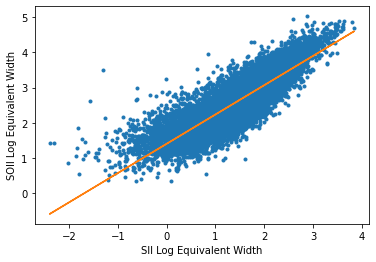

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

reg = LinearRegression().fit(df['SII'].values.reshape(-1,1),df['OII'])
print('Coefficient of Determination: ',reg.score(df['SII'].values.reshape(-1,1), df['OII']))
predicted_oii = reg.predict(df['SII'].values.reshape(-1,1))


plt.plot(df['SII'],df['OII'],'.')
plt.plot(df['SII'], predicted_oii)
plt.xlabel('SII Log Equivalent Width')
plt.ylabel('SOII Log Equivalent Width')

plt.show()

Coefficient of Determination:  0.748190293587391


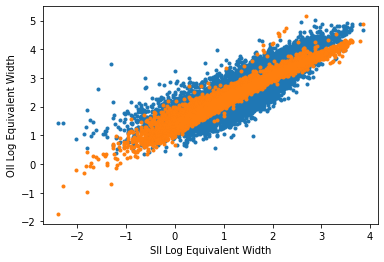

In [4]:

reg = LinearRegression().fit(df[['SII','Halpha','Hbeta']],df['OII'])
print('Coefficient of Determination: ',reg.score(df[['SII','Halpha','Hbeta']], df['OII']))
predicted_oii = reg.predict(df[['SII','Halpha','Hbeta']])


plt.plot(df['SII'],df['OII'],'.')
plt.plot(df['SII'], predicted_oii,'.')
plt.xlabel('SII Log Equivalent Width')
plt.ylabel('OII Log Equivalent Width')

plt.show()

Coefficient of Determination:  0.748190293587391


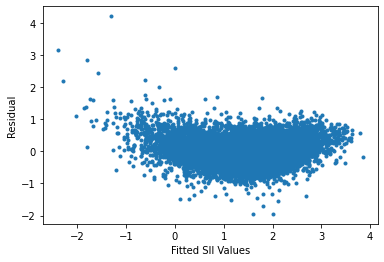

In [5]:

reg = LinearRegression().fit(df[['SII','Halpha','Hbeta']],df['OII'])
print('Coefficient of Determination: ',reg.score(df[['SII','Halpha','Hbeta']], df['OII']))
predicted_oii = reg.predict(df[['SII','Halpha','Hbeta']])

residuals = df['OII'] - predicted_oii

plt.plot(df['SII'], residuals,'.')
plt.xlabel('Fitted SII Values')
plt.ylabel('Residual')

plt.show()

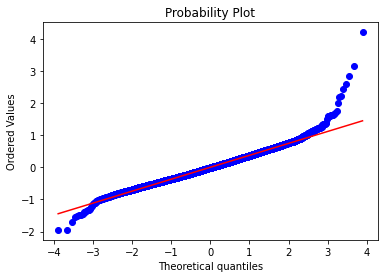

In [6]:
import scipy.stats as stats
res = stats.probplot(residuals, dist="norm",plot=plt)
plt.show()

In [7]:
#pip install loess

In [8]:
from loess.loess_1d import loess_1d
xout, yout, wout = loess_1d(df['SII'].values, df['OII'].values, xnew=None, degree=1, frac=0.27,
                            npoints=None, rotate=False, sigy=None)

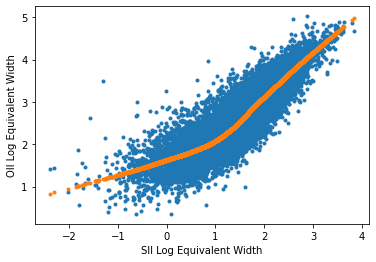

In [9]:
plt.plot(df['SII'],df['OII'],'.')
plt.plot(df['SII'], yout,'.')
plt.xlabel('SII Log Equivalent Width')
plt.ylabel('OII Log Equivalent Width')

plt.show()

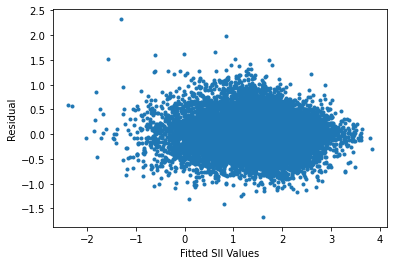

In [10]:
residuals = df['OII'] - yout

plt.plot(df['SII'], residuals,'.')
plt.xlabel('Fitted SII Values')
plt.ylabel('Residual')

plt.show()

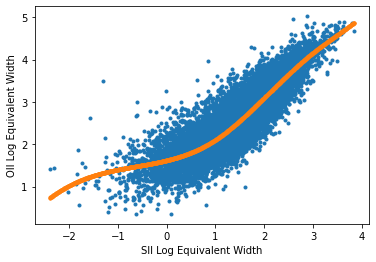

In [11]:
from scipy import interpolate

gind = np.argsort(df['SII'].values)
X = df['SII'].values[gind]
y = df['OII'].values[gind]


tck = interpolate.splrep(X,y, t=[1,2,3])
new_x = np.linspace(np.min(X),np.max(X),1000)
new_y = interpolate.splev(new_x, tck, der=0)

plt.plot(df['SII'],df['OII'],'.')
plt.plot(new_x, new_y,'.')
plt.xlabel('SII Log Equivalent Width')
plt.ylabel('OII Log Equivalent Width')

plt.show()